In [1]:
%reload_ext autoreload
%matplotlib notebook
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns


import math


import cPickle as pickle

import datetime




from IPython.display import display, HTML

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# import tensorflow as tf
import statsmodels.api as sm

/scratch/cluster/lty/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
from IPython.display import Audio

In [4]:
Audio("./yanny-laurel.wav")

In [5]:
import scipy.io.wavfile
rate, data = scipy.io.wavfile.read("./yanny-laurel.wav")

In [6]:
print rate

48000


In [7]:
print data.shape

(185519, 2)


<IPython.core.display.Javascript object>


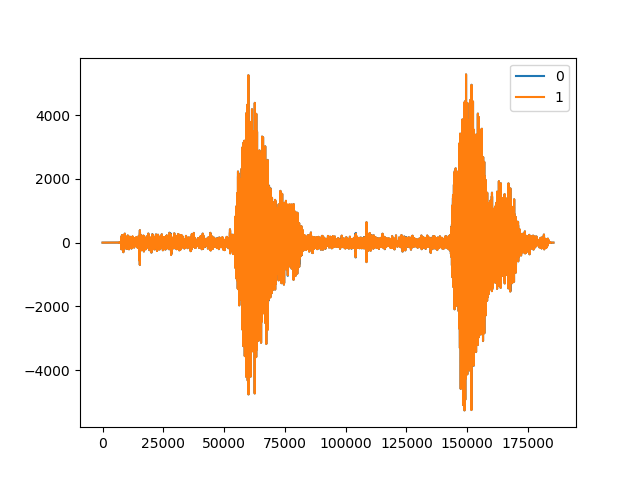

<IPython.core.display.Javascript object>


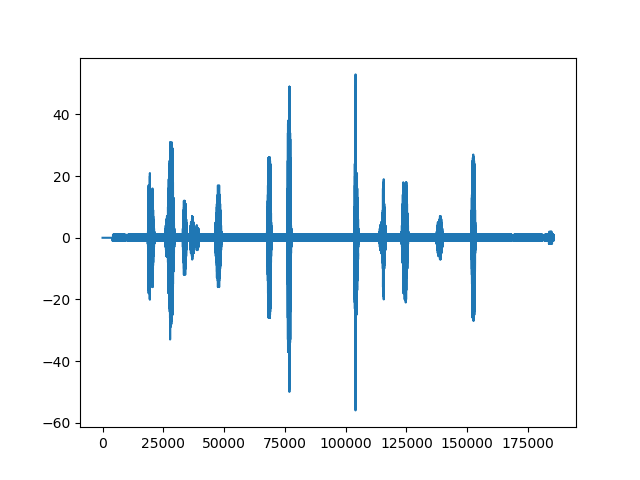

In [8]:
plt.figure()
plt.plot(data[:, 0], label="0")
plt.plot(data[:, 1], label="1")

plt.legend()

plt.figure()
plt.plot(data[:, 0] - data[:, 1])

In [9]:
import scipy.io.wavfile
from IPython.display import Audio

def play_np(a, rate, fname="test.wav"):
    scipy.io.wavfile.write(fname, rate=rate, data=a)
    return Audio(fname)

In [10]:
play_np(data[56 * 1000:, 0], rate)

In [11]:
import scipy.fftpack

In [12]:
ft1 = scipy.fftpack.fft(data[:, 1])
ft0 = scipy.fftpack.fft(data[:, 0])

<IPython.core.display.Javascript object>


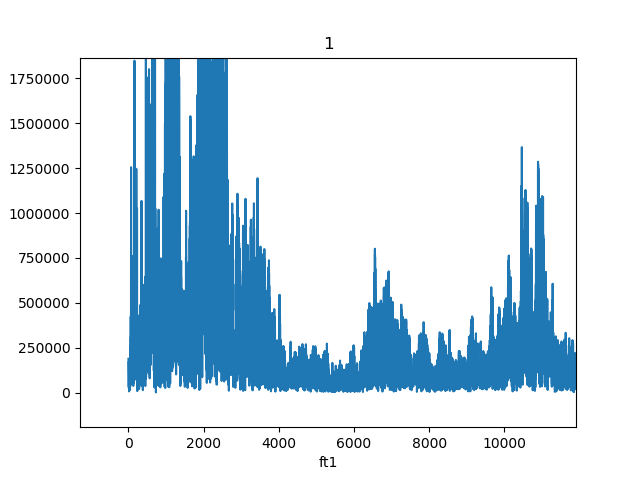

<IPython.core.display.Javascript object>


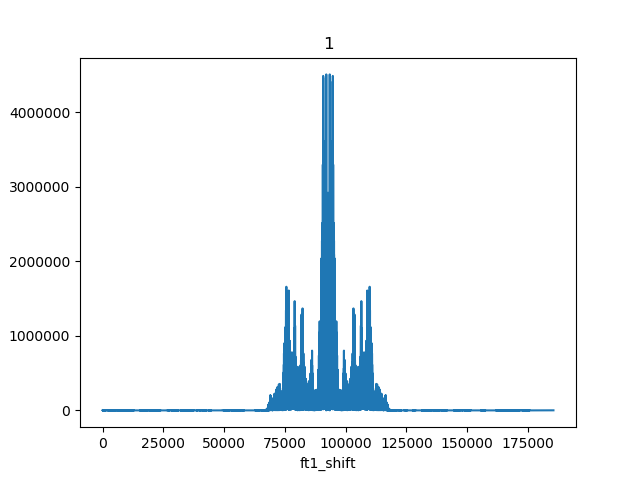

Text(0.5,0,'ft1_shift')

In [14]:
ft1_shift = scipy.fftpack.fftshift(ft1)
plt.figure()
plt.plot(np.abs(ft1))
plt.xlabel("ft1")
plt.title("1")
plt.figure()
plt.plot(np.abs(ft1_shift))
plt.title("1")
plt.xlabel("ft1_shift")

<IPython.core.display.Javascript object>


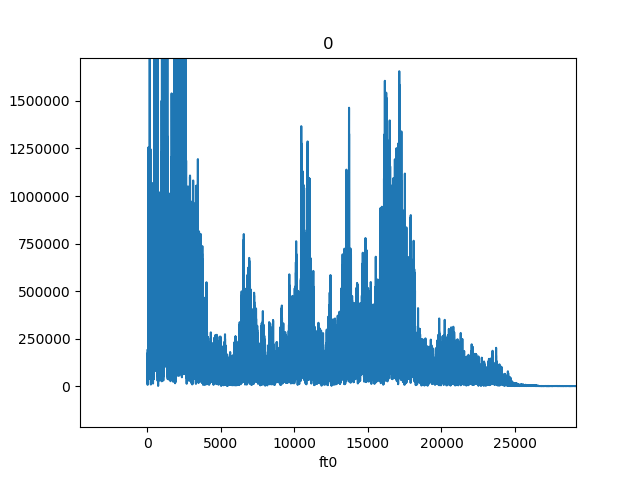

<IPython.core.display.Javascript object>


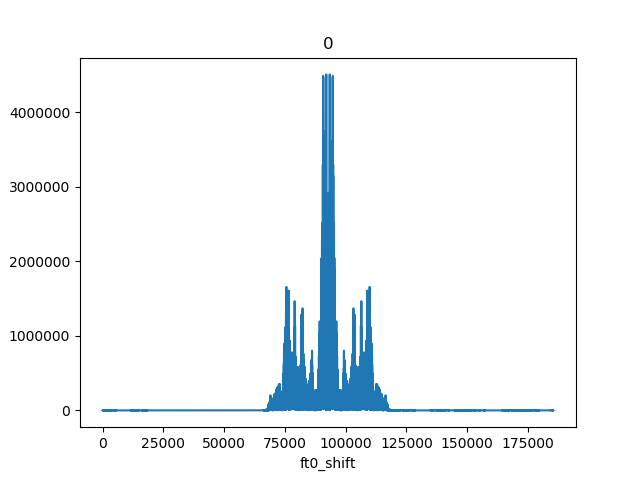

Text(0.5,0,'ft0_shift')

In [15]:
ft0_shift = scipy.fftpack.fftshift(ft0)
plt.figure()
plt.plot(np.abs(ft0))
plt.xlabel("ft0")
plt.title("0")
plt.figure()
plt.plot(np.abs(ft0_shift))
plt.title("0")
plt.xlabel("ft0_shift")

In [32]:
fth = 5000

ift_input = np.hstack((ft0.reshape((-1, 1)), ft1.reshape((-1, 1))))
print ift_input.shape
print data.shape

ift_input[fth:-fth, :] = 0

test_data = np.zeros(shape=ift_input.shape)

for i in xrange(2):
    test_data[:, i] = scipy.fftpack.ifft(ift_input[:, i])

    


(185519, 2)
(185519, 2)


/scratch/cluster/lty/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


In [34]:
play_np(test_data, rate, fname="low-freq.wav")

In [35]:
fth = 5000

ift_input = np.hstack((ft0.reshape((-1, 1)), ft1.reshape((-1, 1))))
print ift_input.shape
print data.shape

ift_input[:fth, :] = 0
ift_input[-fth:, :] = 0

test_data = np.zeros(shape=ift_input.shape)

for i in xrange(2):
    test_data[:, i] = scipy.fftpack.ifft(ift_input[:, i])

    


(185519, 2)
(185519, 2)


/scratch/cluster/lty/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


In [36]:
play_np(test_data, rate, fname="high-freq.wav")